In [26]:
%matplotlib qt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne


In [2]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'


all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']


# path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac

In [114]:
bad_participants = []
for i in all_participants:
    participant = i
    
    folder = path + participant +'/'
    epochs = mne.read_epochs(folder +  participant + '_' + epoch_type + '_' +  'ar_subtracted_epo.fif', verbose = False) 

    if bad_participant(epochs, probe= 'PC', mind = 'mind2'):
        bad_participants.append(participant)

print(bad_participants)

good_participants = [x for x in all_participants if x not in bad_participants]
print(f'{len(good_participants)} participants remaining')

['VP08', 'VP09', 'VP12', 'VP13', 'VP14', 'VP19', 'VP20', 'VP23', 'VP25', 'VP29', 'VP30', 'VP31', 'VP32', 'VP33']
12 participants remaining


In [118]:
evoked_mw = []
evoked_ot = []

for i in good_participants:
    participant = i

    folder = path + participant +'/'
    
    #############################
    #### With ERP SUBTRACTED ####
    #############################
    epochs = mne.read_epochs(folder +  participant + '_' + epoch_type + '_' +  'ar_subtracted_epo.fif', verbose = False) 
    epochs.info['description'] = 'biosemi/64' #necessary for wSMI 
    epochs =  epochs.pick_types(eeg = True) #EOGs break everything\
    

    evoked_ot.append(epochs['PC/on-task/correct/go'].average())
    try:
        evoked_mw.append(mne.concatenate_epochs([epochs['PC/sMW/correct/go'], epochs['PC/dMW/correct/go']]).average())
    except:
        try:
            evoked_mw.append(epochs['PC/sMW/correct/go'].average())
        except:
            try:
                evoked_mw.append(epochs['PC/dMW/correct/go'].average())
            except:
                pass
    
    
    
    
    
    
    

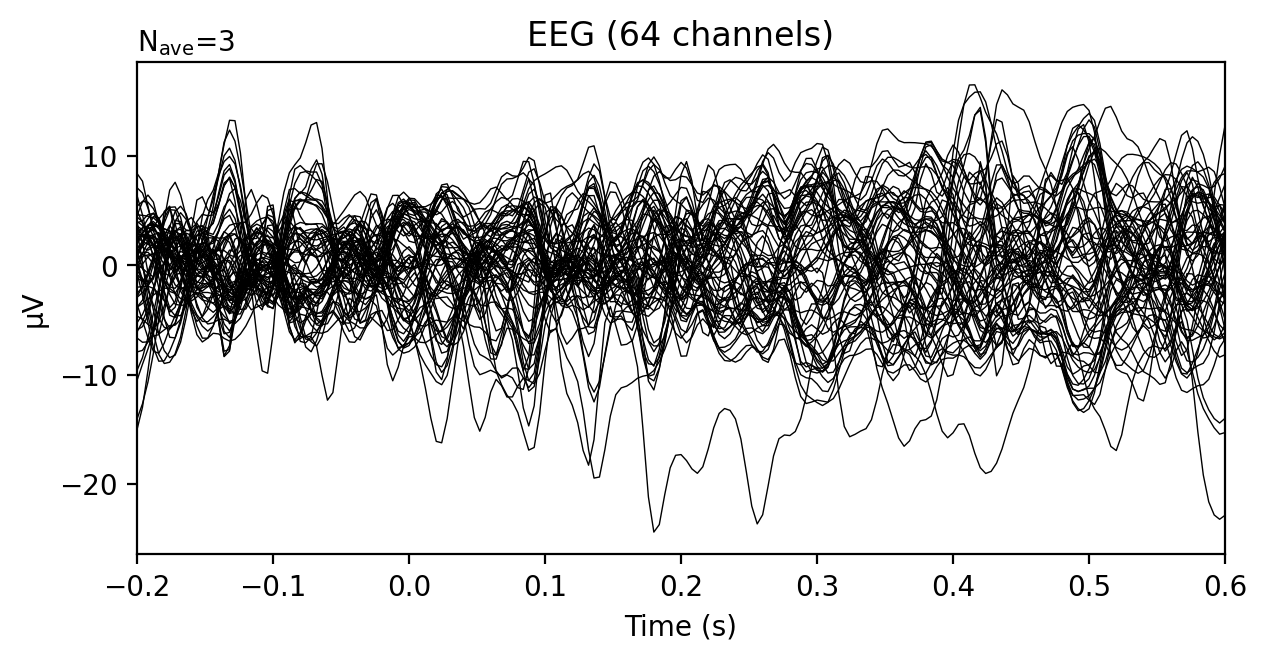

In [129]:
evoked  = epochs['PC/sMW/correct/go'].average()
evoked.plot()

In [131]:
mne.combine_evoked(evoked_ot, weights = 'equal').plot()

AttributeError: 'EvokedArray' object has no attribute 'grand_average'

Identifying common channels ...


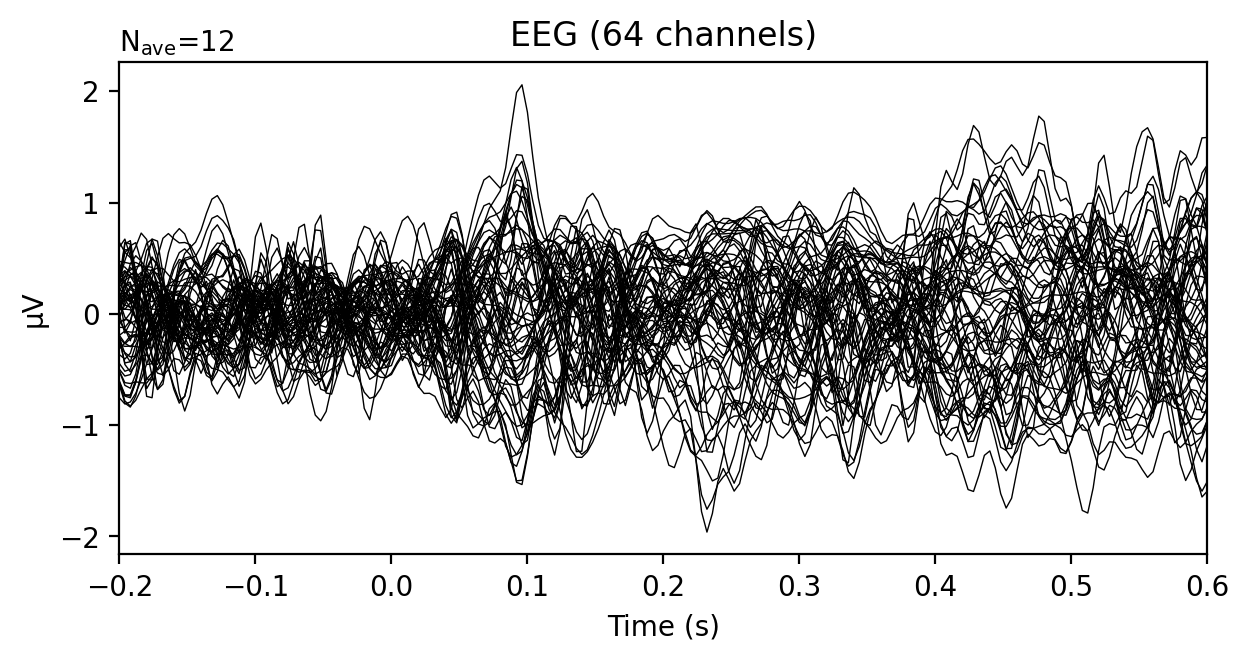

In [135]:
mne.grand_average(evoked_ot).plot()

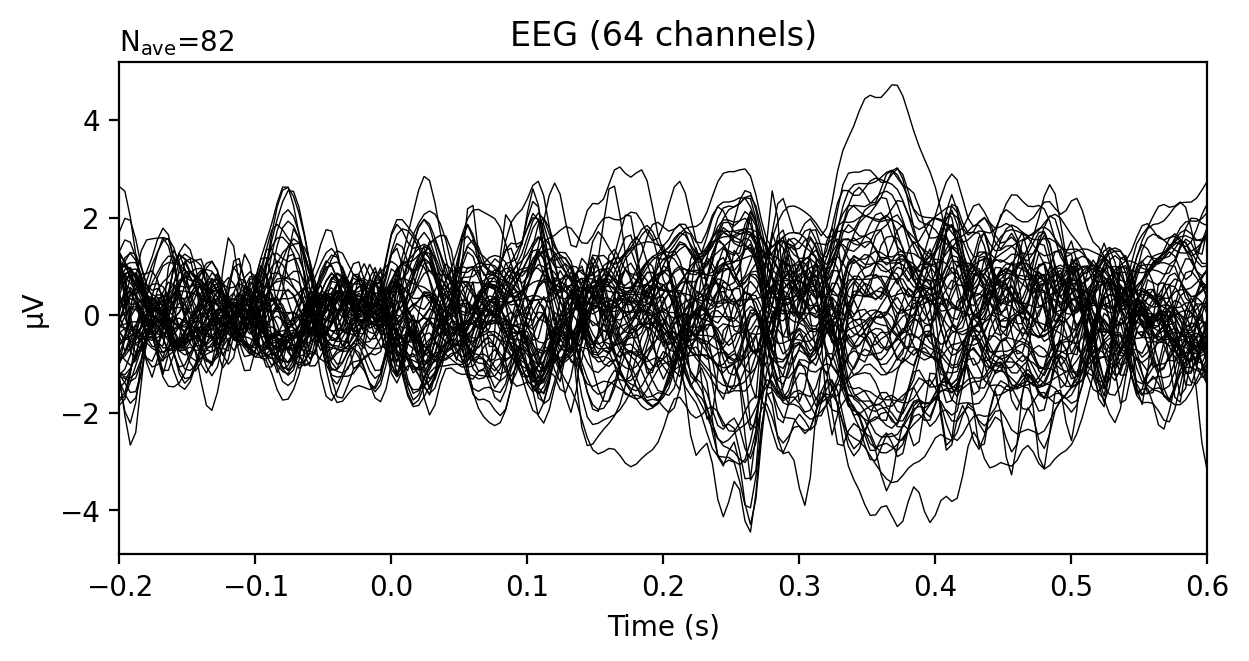

In [33]:
mne.combine_evoked([epochs['PC/on-task/correct/go'].average(), epochs['PC/on-task/correct/go'].average()], weights = 'equal')